In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.modelling.fault.fault_function import BaseFault
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.utils import process_map2loop
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lgrose/

### Map figure

In [2]:
import geopandas as gpd
from shapely.geometry import Polygon
import contextily as ctx

In [3]:
aus = gpd.read_file('POA_2016_AUST.shp')
aus

,POA_CODE16,POA_NAME16,AREASQKM16,geometry
0,0800,0800,3.1734,"POLYGON ((130.83454 -12.45798, 130.83395 -12.4..."
1,0810,0810,23.7902,"POLYGON ((130.84711 -12.37754, 130.84726 -12.3..."
2,0812,0812,35.8899,"POLYGON ((130.89192 -12.36879, 130.89221 -12.3..."
3,0815,0815,0.6381,"POLYGON ((130.87240 -12.37655, 130.87235 -12.3..."
4,0820,0820,39.0462,"POLYGON ((130.83499 -12.43006, 130.83508 -12.4..."
...,...,...,...,...
2665,7468,7468,309.9843,"MULTIPOLYGON (((145.19451 -42.19607, 145.19449..."
2666,7469,7469,5893.7056,"MULTIPOLYGON (((144.76361 -41.43594, 144.76359..."
2667,7470,7470,108.0510,"POLYGON ((145.52191 -41.77599, 145.52226 -41.7..."
2668,9797,Migratory - Offshore - Shipping (Aust.),0.0000,None


<AxesSubplot:>

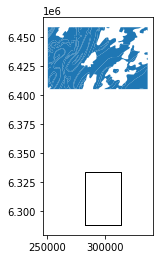

In [13]:
fig, ax = plt.subplots(1)
bbox=(283083.97035006597, 
      6288246.556058325, 
      313436.85126619646, 
      6334162.51507936)
# python/map2loop/SA/tmp/
geology_file = '/home/lgrose/dev/python/map2loop/SA/tmp/geol_clip.shp'
geology_ll = gpd.read_file(geology_file)#,bbox=bbox)
bb = pd.read_csv('/home/lgrose/dev/python/map2loop/SA/tmp/bbox.csv')

polygon = Polygon([(bbox[0], bbox[1]), (bbox[0], bbox[3]), (bbox[2], bbox[3]), (bbox[2], bbox[1]), (bbox[0], bbox[1])])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=geology_ll.crs)
poly_gdf.plot(color='white',edgecolor='black',ax=ax)
geology_ll.plot(ax=ax)

<AxesSubplot:>

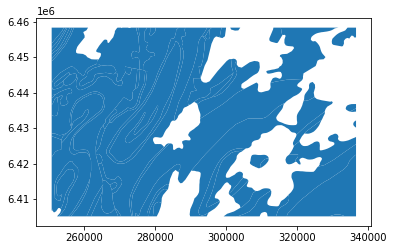

In [14]:
geology_ll.plot()

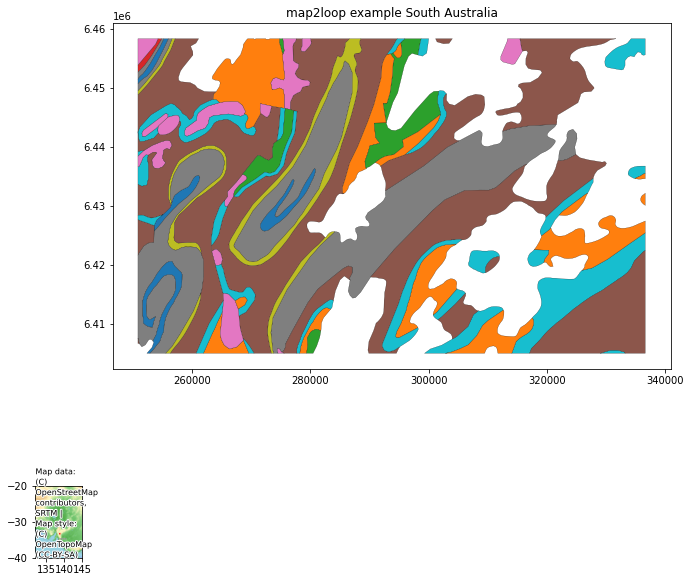

In [24]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
plt.title('map2loop example South Australia')
# geology_ll = gpd.read_file(geology_file,bbox=bbox)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
sub_ax = plt.axes([-0.2, 0, 0.5, 0.1])
# sub_ax.axis('off')
# print(world['continent'].unique())
# australia = world[world['name'] == 'Australia']
# australia.plot(color='white',edgecolor='black',ax=sub_ax)
poly_gdf.to_crs(world.crs).plot(ax=sub_ax,color='red')
sub_ax.set_xlim(132,145)
sub_ax.set_ylim(-40,-20)
ctx.add_basemap(sub_ax,source=ctx.providers.OpenTopoMap,crs=world.crs,zoom=5)
# geology_ll[c_l['g']].fillna(geology_ll[c_l['g2']], inplace=True)
# geology_ll[c_l['g']].fillna(geology_ll[c_l['c']], inplace=True)
# display(geology_ll.head())
base=geology_ll.plot(column='STRATNAME',edgecolor='#000000',linewidth=0.2,ax=ax)
# world.plot(bbox=(111.00, -44.00, 160.00, -8.00))

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/geopandas/plotting.py:433: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.draw()
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/contextily/plotting.py:249: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  draw()
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/geopandas/plotting.py:824: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.draw()
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


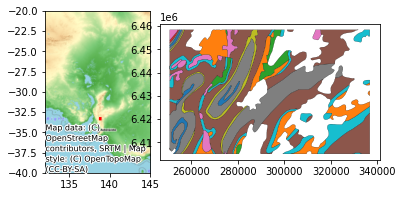

In [47]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 6)
f3_ax1 = fig3.add_subplot(gs[:, :2])
# f3_ax1.set_title('gs[0, :-2]')
f3_ax2 = fig3.add_subplot(gs[:, 2:])
# f3_ax2.set_title('gs[1, :-1]')
# f3_ax3 = fig3.add_subplot(gs[1:, -1])
# f3_ax3.set_title('gs[1:, -1]')
# f3_ax4 = fig3.add_subplot(gs[-1, 0])
# f3_ax4.set_title('gs[-1, 0]')
# f3_ax5 = fig3.add_subplot(gs[-1, -2])
# f3_ax5.set_title('gs[-1, -2]')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# sub_ax = plt.axes([-0.2, 0, 0.5, 0.1])

poly_gdf.to_crs(world.crs).plot(ax=f3_ax1,color='red')
f3_ax1.set_xlim(132,145)
f3_ax1.set_ylim(-40,-20)
ctx.add_basemap(f3_ax1,source=ctx.providers.OpenTopoMap,crs=world.crs,zoom=5)
# geology_ll[c_l['g']].fillna(geology_ll[c_l['g2']], inplace=True)
# geology_ll[c_l['g']].fillna(geology_ll[c_l['c']], inplace=True)
# display(geology_ll.head())
base=geology_ll.plot(column='STRATNAME',edgecolor='#000000',linewidth=0.2,ax=f3_ax2)

In [6]:
fault_params = {'interpolatortype':'FDI',
                'nelements':1e4,
                'data_region':.1,
                'solver':'pyamg',
#                 'length_scale':1.5,
#                 overprints:overprints,
                'cpw':10,
                'npw':10}

foliation_params = {'nelements':1e5,# how many tetras/voxels
                    'interpolatortype':'PLI',
                    'buffer':0.5,  # how much to extend nterpolation around box
                    'solver':'cg',
#                     'damp':True,
#                    'cgw':0.05
                    'npw':2,
                    'cpw':2
                   }

model, m2l_data = GeologicalModel.from_map2loop_directory(os.getcwd()+'/SA'
                                                          ,#'/home/lgrose/dev/python/map2loop/Turner_Syncline/',
                                                          skip_faults=False,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params,
#                                                           m2lflags={'gradient':True,
#                                                                    'vector_scale':10/73803.31637116836},
#                                                          unconformities=False
                                                          rescale=True
                                                         )



In [7]:
view = LavaVuModelViewer(model)

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/visualisation/model_visualisation.py:668: RuntimeWarning: invalid value encountered in true_divide
  vector /= np.linalg.norm(vector, axis=1)[:, None]



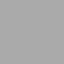

In [9]:
# view.nsteps = np.array([200,200,200])
view.clear()
view.set_zscale(1)
# view.add_data(model.get_feature_by_name('supergroup_0'), cmap='rainbow')
# view.add_vector_data(ncp[:,:3],ncp_v[:,3:6],'test',colour='red')
# view.add_model(cmap='tab20')
# view.nsteps=np.array([50,50,50])
# view.add_vector_field(model.get_feature_by_name('supergroup_0'), locations=model.get_feature_by_name('supergroup_0').interpolator.get_norm_constraints()[:,:3],
#                      colour='red'
#                     )
# for f in model.features:
#     if f.type == 'fault':
#         view.add_data(f[0])
view.add_data(model.get_feature_by_name('supergroup_0'))
view.add_model_surfaces()
# view.add_isosurface(model.get_feature_by_name('supergroup_0'),nslices=10)
view.rotation = [25.041057586669922, 77.6208724975586, 104.24987030029297]
view.interactive()

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:68: RuntimeWarning: invalid value encountered in greater
  r[v > 0] = self.positive(v[v > 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:69: RuntimeWarning: invalid value encountered in less
  r[v < 0] = self.negative(v[v < 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:48: RuntimeWarning: invalid value encountered in greater
  eva[v > self.max_v] = self.w[0] * self.max_v ** 3 + \
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:51: RuntimeWarning: invalid value encountered in less
  eva[v < self.min_v] = self

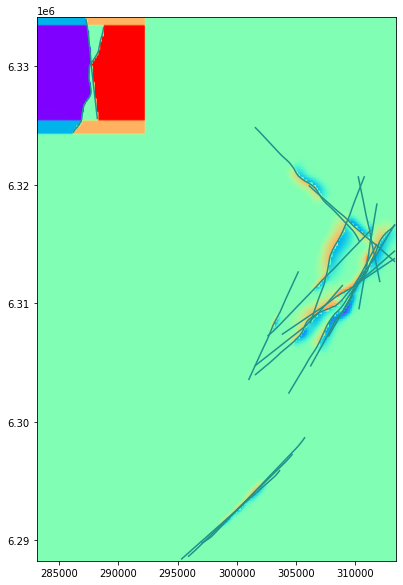

In [10]:
from LoopStructural.visualisation import MapView
mapview = MapView(model)
mapview.nsteps = (200,200)
mapview.add_fault_displacements()
mapview.add_faults()

(0, 3) (1, 494)


<ipython-input-12-0549a24314d6>:3: RuntimeWarning: invalid value encountered in arcsin
  v = np.rad2deg(np.arcsin(model.get_feature_by_name('supergroup_0').evaluate_gradient_misfit()))


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

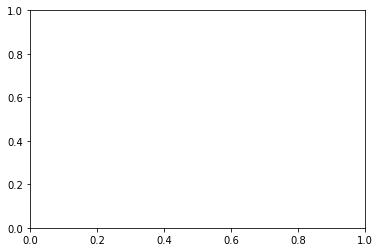

In [12]:
import matplotlib.pyplot as plt
locs = model.get_feature_by_name('supergroup_0').interpolator.get_gradient_constraints()[:,:3]
v = np.rad2deg(np.arcsin(model.get_feature_by_name('supergroup_0').evaluate_gradient_misfit()))
print(locs.shape,v.shape)
plt.scatter(locs[:,0],locs[:,1],c=v, cmap='rainbow')
plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt
vcp = model.features[0].interpolator.get_value_constraints()
plt.scatter(vcp[:,0],vcp[:,1],c=vcp[:,3])
plt.colorbar()

In [ ]:
model.stratigraphic_column

In [ ]:
# %%notify
view = LavaVuModelViewer(model,vertical_exaggeration=2)
# view.nsteps = np.array([200,200,200])
# view.set_zscale(2)
# view.add_data(model.features[0],cmap='tab20')
# view.add_model(cmap='tab20')
# view.nsteps=np.array([50,50,50])
# view.add_model_surfaces()
view.add_isosurface(model.features[0],nslices=10)
view.add_data(model.features[0])
# view.add_isosurface(model.features[0][2],slices=[-1,1])
# view.add_isosurface(model.features[-1])
# view.nsteps = np.array([200,200,50])
# view.add_model(cmap='tab20')

view.interactive()

In [ ]:
view.display()

In [ ]:
view2 = LavaVuModelViewer(model,vertical_exaggeration=2)
# view2.nsteps = np.array([200,200,200])
# # view.set_zscale(2)
# # view.add_data(model.features[0],cmap='tab20')
# view2.add_model(cmap='tab20')
# view2.add_section(model.get_feature_by_name('Fault_12641').displacementfeature,'z',value=model.bounding_box[1,2])
# view2.nsteps=np.array([50,50,50])
# # view.add_model_surfaces()
# # view2.add_model_surfaces(model.get_feature_by_name('supergroup_0'))

# view2.add_isosurface(model.get_feature_by_name('Fault_12641'),slices=[-1,0,1])
# view2.add_isosurface(model.get_feature_by_name('Fault_12641')[2],slices=[-1,1])

# view2.add_data(model.get_feature_by_name('Fault_12641')[0])
# view2.add_data(model.get_feature_by_name('Fault_12641')[1])
# view2.add_data(model.get_feature_by_name('Fault_12641')[2])
# view2.add_section(model.get_feature_by_name('Fault_12641').displacementfeature,'z',value=model.bounding_box[1,2])
points = model.regular_grid(nsteps=(80,80,80))
for f in model.get_feature_by_name('supergroup_0').faults:
    points = f.apply_to_points(points)
# mask = model.get_feature_by_name('Fault_12641').evaluate(points)
# points = model.get_feature_by_name('Fault_12641').apply_to_points(points)
view2.add_points(points,'faulted')

view2.interactive()

In [ ]:
m2l_data['max_displacement']

In [ ]:
model.maximum-model.origin

In [ ]:
formation_thickness = pd.read_csv(os.getcwd() +'/qld'+ '/output/formation_thicknesses.csv')
formation_thickness

In [ ]:
thickness = {}
for f in formation_thickness['formation'].unique():
    thickness[f] = np.mean(formation_thickness[formation_thickness['formation'] == f]['thickness'])

In [ ]:
thickness

In [ ]:
from matplotlib import cm
tab = cm.get_cmap('tab20',18)
ci = 0
viewer = LavaVuModelViewer(model)
for g in model.stratigraphic_column.keys():
    if g in model.feature_name_index:
        feature = model.features[model.feature_name_index[g]]
        for u, vals in model.stratigraphic_column[g].items():
            viewer.add_isosurface(feature, isovalue=vals['max'],name=u,colour=tab.colors[ci,:])
            ci+=1
for f in model.features:
    if f.type == 'fault':
        viewer.add_isosurface(f,isovalue=0)
    #         print(u)
#         print(vals)
# viewer.add_isosurface(model.stratigraphic_column
viewer.interactive()

In [ ]:
viewer.image('coloured_hams.png')

In [ ]:
n_units = 0 #count how many discrete colours
for g in model.stratigraphic_column.keys():
    for u in model.stratigraphic_column[g].keys():
        n_units+=1

In [ ]:
n_units

In [ ]:
model, m2l_data = GeologicalModel.from_map2loop_directory(os.getcwd()+'/hamersley',
                                                          skip_faults=False,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)

In [ ]:
view = LavaVuModelViewer(model)
view.nsteps = np.array([200,200,200])
# view.add_scalar_field(model.features[0],cmap='tab20')
view.add_model(cmap='tab20')
view.interactive()

In [ ]:
view.display()

In [ ]:
m2l_data = process_map2loop()
m2l_data['bounding_box']['lower'] -=10000

In [ ]:
boundary_points = np.zeros((2,3))
boundary_points[0,0] = m2l_data['bounding_box']['minx']#500000.0000000026#origin[0]#-1000#-10 #np.min(coords[:,0])-10
boundary_points[0,1] = m2l_data['bounding_box']['miny']#7454093.693147668#origin[1]#-1000#-10 #np.min(coords[:,1])
boundary_points[0,2] = m2l_data['bounding_box']['lower']#-20000#origin[2]#-4500#-5000#0#-40#minz
boundary_points[1,0] = m2l_data['bounding_box']['maxx']#605065.8521#maximum[0]#10000#10000 #np.max(coords[:,0])
boundary_points[1,1] = m2l_data['bounding_box']['maxy']#7567173.042479938#maximum[1]#10000#12000 #np.max(coords[:,1])
boundary_points[1,2] = m2l_data['bounding_box']['upper']#maximum[2]#500#500#-50000#-minz*0.1

In [ ]:
boundary_points[1,:] - boundary_points[0,:]

### Import and preprocess data

In [ ]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(m2l_data['data'])

In [ ]:
m2l_data['data'].loc[:,['tx','ty','tz']] = np.nan

In [ ]:
fault_names = m2l_data['max_displacement'].keys()

In [ ]:
## loop through all of the groups and add them to the model in youngest to oldest. 
group_features = []
for i in m2l_data['groups']['group number'].unique():
    g = m2l_data['groups'].loc[m2l_data['groups']['group number'] == i,'group'].unique()[0]
    group_features.append(model.create_and_add_foliation(g,
                                   interpolatortype="PLI", #which interpolator to use
                                    nelements=1e5, # how many tetras/voxels
                                    buffer=0.5, # how much to extend nterpolation around box
                                    solver='pyamg',
                                    damp=True))
    # if the group was successfully added (not null) then lets add the base (0 to be unconformity)
    if group_features[-1]:
        model.add_unconformity(group_features[-1]['feature'],0)
        
# # wyloo =  model.create_and_add_foliation('Wyloo_Group', #identifier in data frame
# #                                                 interpolatortype="PLI", #which interpolator to use
# #                                                 nelements=1e5, # how many tetras/voxels
# #                                                 buffer=0.5, # how much to extend nterpolation around box
# #                                                 solver='pyamg',
# #                                                 damp=True
# #                                                )
# # # wyloo_unconf = model.add_unconformity(wyloo['feature'],0)
# # shingle =  model.create_and_add_foliation('Shingle_Creek_Group', #identifier in data frame
# #                                                 interpolatortype="PLI", #which interpolator to use
# #                                                 nelements=1e5, # how many tetras/voxels
# #                                                 buffer=0.5, # how much to extend nterpolation around box
# #                                                 solver='pyamg',
# #                                                 damp=True
# #                                                )
# # # shingle_unconf = model.add_unconformity(shingle['feature'],0)
# # turee =  model.create_and_add_foliation('Turee_Creek_Group', #identifier in data frame
# #                                                 interpolatortype="PLI", #which interpolator to use
# #                                                 nelements=1e5, # how many tetras/voxels
# #                                                 buffer=0.5, # how much to extend nterpolation around box
# #                                                 solver='pyamg',
# #                                                 damp=True
# #                                                )
# # # turee_unconf = model.add_unconformity(turee['feature'],0)
# hams = model.create_and_add_foliation('Hamersley_Group', #identifier in data frame
#                                                 interpolatortype="PLI", #which interpolator to use
#                                                 nelements=1e6, # how many tetras/voxels
#                                                 buffer=0.5, # how much to extend nterpolation around box
#                                                 solver='pyamg',
#                                                 damp=True,
#                                                 cpw=5,
#                                                 gpw=10
#                                                )
# hams_unconf = model.add_unconformity(hams['feature'],0)
# fort = model.create_and_add_foliation('Fortescue_Group', #identifier in data frame
#                                                 interpolatortype="PLI", #which interpolator to use
#                                                 nelements=1e5, # how many tetras/voxels
#                                                 buffer=0.5, # how much to extend nterpolation around box
#                                                 solver='pyamg',
#                                                 damp=True,
#                                                 cpw=5,
#                                                 gpw=40
#                                                )




In [ ]:
model.set_stratigraphic_column(m2l_data['stratigraphic_column'])
viewer = LavaVuModelViewer(model)
viewer.add_model(cmap='tab20')
viewer.interactive()

In [ ]:
model.set_stratigraphic_column(m2l_data['stratigraphic_column'])

In [ ]:
view = LavaVuModelViewer(model)
slices = np.unique(hams['feature'].interpolator.get_value_constraints()[:,3])
view.add_isosurface(hams['feature'],
                             slices=slices,
                             paint_with=hams['feature'],
                   vmin = np.min(slices),
                   vmax = np.max(slices),
                   cmap='tab20')
view.add_data(hams['feature'],cmap='tab20',vmin=np.min(slices),vmax=np.max(slices))

slices = np.unique(fort['feature'].interpolator.get_value_constraints()[:,3])
view.add_isosurface(fort['feature'],
                             slices=slices,
                             paint_with=fort['feature'],
                   vmin = np.min(slices),
                   vmax = np.max(slices),
                   cmap='tab20')
view.add_data(fort['feature'],cmap='tab20',vmin=np.min(slices),vmax=np.max(slices))

view.interactive()

In [ ]:
model_view = LavaVuModelViewer(model)
model_view.nsteps = np.array([200,200,200])
model_view.add_model(cmap='tab20')
model_view.rotate([-65.88673400878906, -49.2296028137207, -20.79029655456543])
model_view.display()

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([400,400,100])
viewer.add_model(cmap='tab20')
viewer.nsteps = np.array([50,50,20])
# viewer.add_isosurface(hams['feature'],
#                              slices=np.unique(hams['feature'].interpolator.get_value_constraints()[:,3]),
#                              paint_with=hams['feature'])
# viewer.add_isosurface(fort['feature'],
#                              slices=np.unique(fort['feature'].interpolator.get_value_constraints()[:,3]),
#                              paint_with=fort['feature'])
# viewer.add_data(hams['feature'])
viewer.rotate([-65.88673400878906, -49.2296028137207, -20.79029655456543])
# viewer.interactive()
# for f in group_features:
#     if f:
        
#         viewer.add_isosurface(f['feature'],
#                               slices=np.unique(f['feature'].interpolator.get_value_constraints()[:,3]),
#                              paint_with=f['feature'])
#         viewer.add_data(f['feature'])
viewer.display()

In [ ]:
viewer.interactive()

In [ ]:
viewer.display()

In [ ]:
viewer.display()#         viewer.add_data(f['feature'][0],cmap='rainbow'

In [ ]:
viewer = LavaVuModelViewer(model)
# viewer.nsteps = np.array([100,100,100])
for f in faults:
#     try:

        viewer.add_isosurface(f['feature'][0],
#                               slices=[-1,0,1],
#                             paint_with=f['feature'].displacementfeature,
                              isovalue=0,
                              region=lambda pos: f['feature'].displacementfeature.evaluate_value(pos) != 0 
                             )
#         viewer.add_data(f['feature'][0],cmap='rainbow')

#         break
#     except:
#         continue
# viewer.nsteps = np.array([100,100,100])
viewer.add_isosurface(hams['feature'],
                     slices=np.unique(hams['feature'].interpolator.get_value_constraints()[:,3]),
#                       isovalue=0,
                             paint_with=hams['feature'])
viewer.add_isosurface(fort['feature'],
                     slices=np.unique(fort['feature'].interpolator.get_value_constraints()[:,3]),
                             paint_with=fort['feature'],
                     cmap='tab20')
viewer.add_data(hams['feature'],tang=False)
viewer.add_data(fort['feature'],tang=False,grad=False,cmap='tab20')
# viewer.add_section(None,value=0,colour='white')
# viewer.add_section(faults[6]['feature'].displacementfeature,axis='z',value=0,paint_with='white')
# viewer.add_model()
viewer.interactive()

In [ ]:
fort['feature'].faults

In [ ]:
# viewer.display()

In [ ]:
from LoopStructural.visualisation import MapView
mapview = MapView(model)
mapview.add_data(hams['feature'])
mapview.add_data(fort['feature'])


In [ ]:
from LoopStructural.visualisation import MapView
mapview = MapView(model)
for f in faults:
    mapview.add_data(f['feature'][0])
# mapview.add_data(fort['feature']

In [ ]:
import logging
logger = logging.getLogger()

In [ ]:
logger

In [ ]:
logger.handlers

In [ ]:
logging.basicConfig(level=logging.WARNING)

In [ ]:
logger

In [ ]:

from itertools import islice

with open('default-loop-structural-logfile') as inf:
    for line in islice(inf, 0, 11):
        print(line)

In [ ]:
import pathlib
pathlib.Path(__file__).parent.absolute()

In [ ]:
fault_map = LavaVuModelViewer(model)
fault_map.add_section(model.features[0].displacementfeature,'z',0)
fault_map.interactive()

In [ ]:
model.features[0].displacementfeature

In [ ]:
downloaded = False
while downloaded == False:
    try:
        download()
        downloaded=True
    except:
        time.sleep(10)
        

In [ ]:
import time
time.sleep(10)